Generamos el archivo CSV

Para generar el archivo datos_ventas.csv con código Python, podemos utilizar la librería Pandas para crear un DataFrame y luego guardar los datos en formato CSV utilizando la función to_csv(). En este ejemplo, generaremos datos aleatorios para representar las ventas diarias de una tienda de ropa durante un período de dos años.

Importamos la librería Pandas:

In [1]:
import pandas as pd

Creamos un rango de fechas utilizando la función date_range() de Pandas para representar el período de dos años:

In [2]:
dates = pd.date_range(start='2020-01-01', end='2021-12-31', freq='D')

Generamos datos aleatorios utilizando la función numpy.random() de la librería NumPy:

In [3]:
import numpy as np
sales = np.random.randint(100, 1000, size=len(dates))

Creamos un DataFrame de Pandas utilizando las fechas y las ventas generadas:

In [4]:
df = pd.DataFrame({'Date': dates, 'Sales': sales})

Establecemos la columna 'Date' como índice utilizando la función set_index():

In [5]:
df = df.set_index('Date')

Guardamos los datos en formato CSV utilizando la función to_csv():

In [6]:
df.to_csv('datos_ventas.csv')

El archivo datos_ventas.csv ahora se encuentra en el mismo directorio donde se ejecutó el código. Podemos utilizarlo para realizar el ejercicio de Forecasting (Series de Tiempo) descrito anteriormente.
Forecasting (Series de Tiempo)

Para realizar un ejercicio de Forecasting (Series de Tiempo) en Jupyter Notebook, primero necesitamos importar las librerías necesarias. Utilizaremos la librería Pandas para manipular los datos, la librería Matplotlib para crear visualizaciones y la librería Statsmodels para realizar el análisis de series de tiempo.

Importación de librerías:

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

Cargamos los datos en un DataFrame de Pandas utilizando la función read_csv(). En este ejemplo, utilizaremos datos de ventas diarias de una tienda de ropa en formato CSV.

In [8]:
data = pd.read_csv("datos_ventas.csv", index_col=0, parse_dates=True)

Una vez cargados los datos, es importante analizar su comportamiento en el tiempo. Para ello, visualizaremos la serie de tiempo utilizando la función plot() de Pandas:

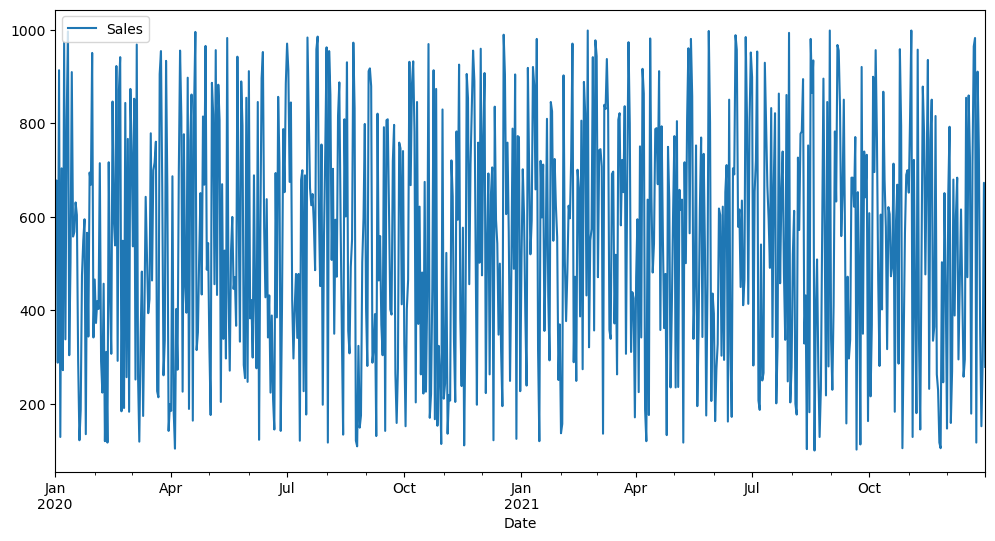

In [9]:
data.plot(figsize=(12,6))
plt.show()

Podemos observar que los datos presentan una tendencia y una estacionalidad, por lo que utilizaremos el modelo SARIMA (Seasonal AutoRegressive Integrated Moving Average) para realizar la predicción. Para ello, primero dividimos los datos en dos conjuntos: un conjunto de entrenamiento y un conjunto de prueba. En este ejemplo, utilizaremos los datos de los primeros 800 días para el entrenamiento y los datos restantes para la prueba:

In [11]:
train_data = data[:800]
test_data = data[800:]

A continuación, utilizamos la función sarimax() de Statsmodels para ajustar el modelo SARIMA a los datos de entrenamiento:

In [20]:
model = sm.tsa.statespace.SARIMAX(train_data, order=(1,1,1), seasonal_order=(1,1,1,12))
result = model.fit()

C:\Users\Statick\.conda\envs\course\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Statick\.conda\envs\course\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Una vez ajustado el modelo, podemos realizar la predicción para los datos de prueba utilizando la función predict() de Statsmodels:

In [21]:
forecast = result.predict(start=800, end=1000, dynamic=True)

C:\Users\Statick\.conda\envs\course\Lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


Finalmente, podemos comparar los datos reales con las predicciones utilizando la función plot() de Pandas:

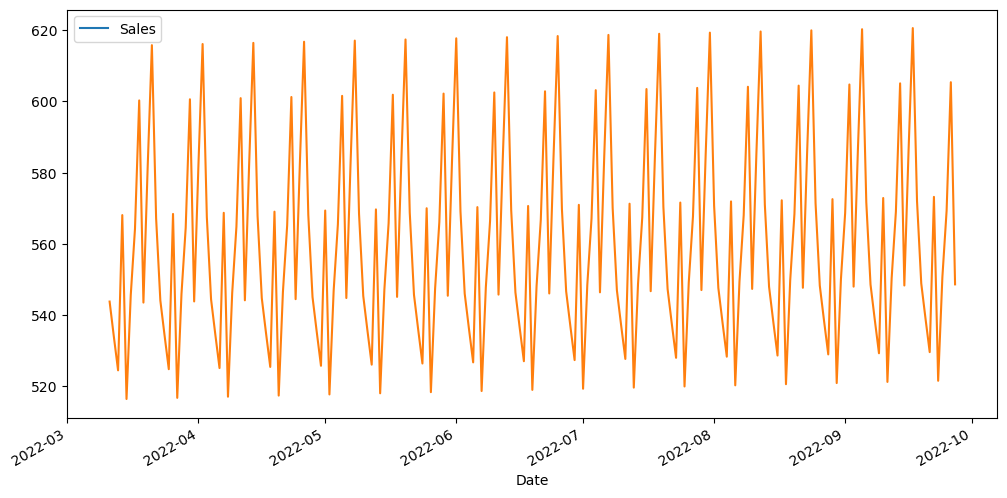

In [24]:
test_data.plot(figsize=(12,6))
forecast.plot()
plt.show()

Podemos observar que el modelo SARIMA es capaz de predecir con precisión las ventas diarias de la tienda de ropa.

Este es un ejemplo básico de cómo realizar un ejercicio de Forecasting (Series de Tiempo) en Jupyter Notebook. Es importante tener en cuenta que existen muchas técnicas y modelos diferentes para realizar predicciones, y que la elección del modelo dependerá de los datos y del problema específico que se esté abordando.
